In [65]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler


In [66]:
import warnings 
warnings.filterwarnings('ignore')

### Load the dataset 

In [67]:
data = pd.read_csv('output.csv')

In [68]:
data.shape

(100000, 26)

In [69]:
data.duplicated().sum()

0

In [70]:
(data.isna().sum() / data.shape[0]) * 100

id               0.00000
url              0.00000
region           0.00000
region_url       0.00000
price            0.00000
year             0.26700
manufacturer     4.06800
model            1.25200
condition       40.85100
cylinders       41.61500
fuel             0.70600
odometer         1.00900
title_status     1.88800
transmission     0.57200
VIN             37.46300
drive           30.54900
size            71.84800
type            21.71900
paint_color     30.54100
image_url        0.01700
description      0.01800
county         100.00000
state            0.00000
lat              1.48500
long             1.48500
posting_date     0.01700
dtype: float64

## Infrence : 
<b>county</b> : is total empty

<b>condition & cylinders </b> : have the most missing values 

<b>VIN </b>: following with condition and cylinders

In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            100000 non-null  int64  
 1   url           100000 non-null  object 
 2   region        100000 non-null  object 
 3   region_url    100000 non-null  object 
 4   price         100000 non-null  int64  
 5   year          99733 non-null   float64
 6   manufacturer  95932 non-null   object 
 7   model         98748 non-null   object 
 8   condition     59149 non-null   object 
 9   cylinders     58385 non-null   object 
 10  fuel          99294 non-null   object 
 11  odometer      98991 non-null   float64
 12  title_status  98112 non-null   object 
 13  transmission  99428 non-null   object 
 14  VIN           62537 non-null   object 
 15  drive         69451 non-null   object 
 16  size          28152 non-null   object 
 17  type          78281 non-null   object 
 18  paint

In [72]:
data.drop(columns=['id', 'url', 'region_url', 'image_url', 'description', 'county', 'state', 'lat', 'long', 'posting_date','VIN'
                  ,'region','model'], inplace=True)
data.shape

(100000, 13)

In [73]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
price,100000.00000,91920.97136,13866763.11671,0.00000,5950.00000,13988.00000,26590.00000,3024942282.00000
year,99733.00000,2011.26741,9.39731,1900.00000,2008.00000,2014.00000,2017.00000,2022.00000
odometer,98991.00000,97929.94831,224416.03613,0.00000,37509.00000,85000.00000,133200.00000,10000000.00000


In [74]:
data.corr(numeric_only=True)

,price,year,odometer
price,1.00000,-0.00392,0.00175
year,-0.00392,1.00000,-0.15061
odometer,0.00175,-0.15061,1.00000


In [75]:
numerical_cols = data.select_dtypes(include=['int64','float64'])
categorical_cols = data.select_dtypes(include=['object'])

### EDA 

#### 1. univarient Analysis

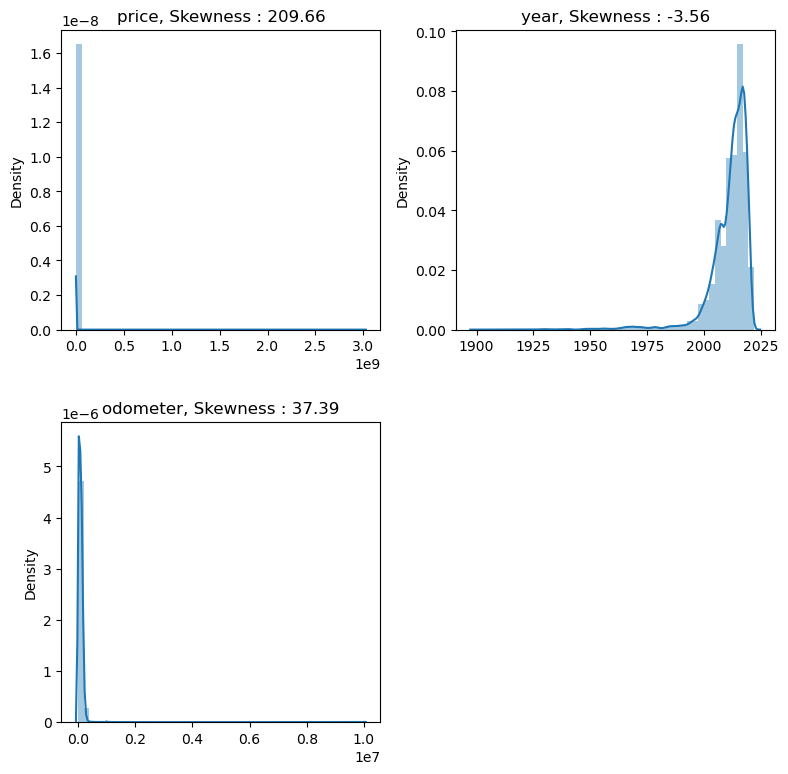

In [76]:
# Displot 
t = 1
plt.figure(figsize=(8,8))

for i in numerical_cols.columns:
    plt.subplot(2,2,t)
    sns.distplot(x = data[i])
    plt.title(f'{i}, Skewness : {round(data[i].skew(),2)}')
    t += 1
plt.tight_layout()
plt.show()

### Infrence :
price has the extreme skewness with (209.66) , following with the odometer at 37.39 and year has -ve skewness with -3.56.

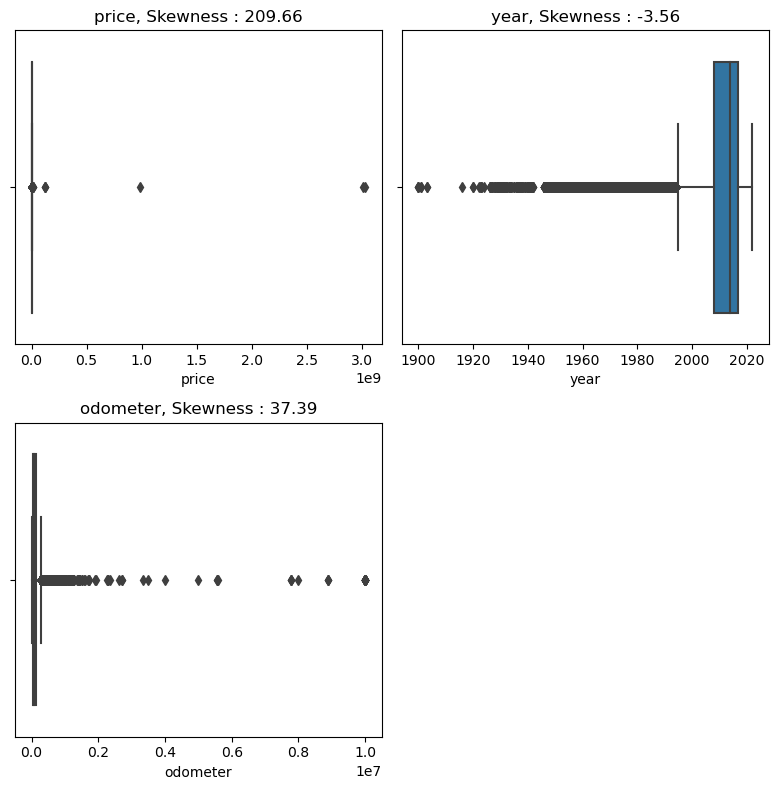

In [77]:
t = 1
plt.figure(figsize=(8,8))

for i in numerical_cols.columns:
    plt.subplot(2,2,t)
    sns.boxplot(x = data[i])
    
    plt.title(f'{i}, Skewness : {round(data[i].skew(),2)}')
    t += 1
plt.tight_layout()
plt.show()

### Inference :

Boxplot shows that price, year and odometer have huge number of outliers

In [78]:
categorical_cols.columns

Index(['manufacturer', 'condition', 'cylinders', 'fuel', 'title_status',
       'transmission', 'drive', 'size', 'type', 'paint_color'],
      dtype='object')

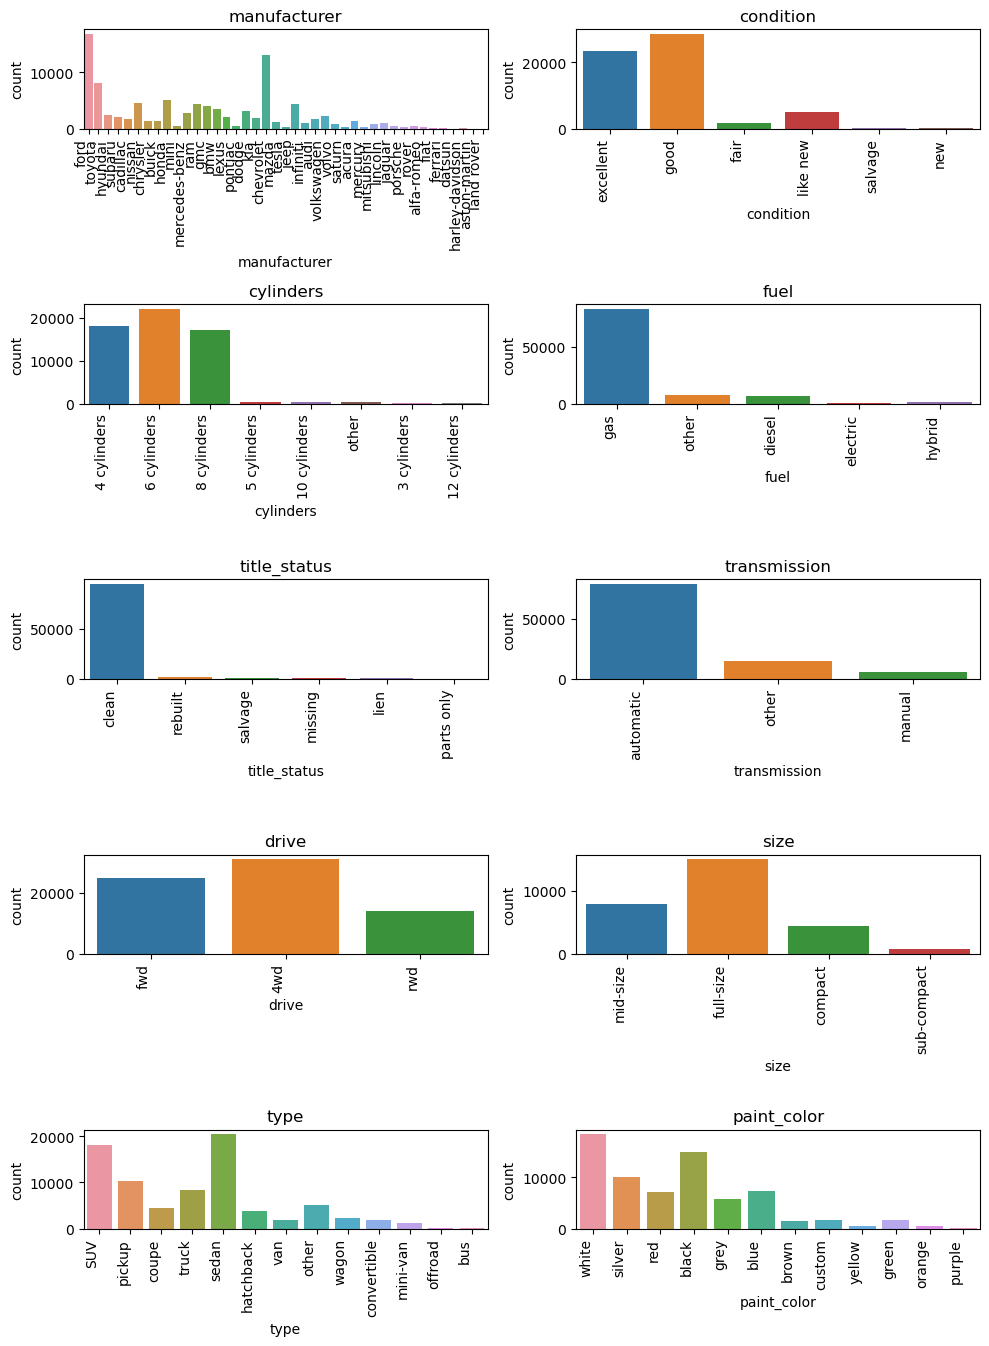

In [79]:
# categorical Data

t = 1
plt.figure(figsize=(10,40))
for i in categorical_cols.columns:
    if i in ['region', 'model']:
        continue
#     print(i)
    plt.subplot(15,2,t)
    plt.title(i)
    sns.countplot(data= data, x = i)
    plt.xticks(rotation=90, ha='right')
    t += 1
plt.tight_layout()
plt.show()


### Inference
<ul>
  <li><b>Manufacturer </b> : Top 5 Most Brands are - 
    <ul>
      <li>1. Ford </li>
            <li>2. Chevrolet </li>
            <li>3. Toyota </li>
            <li>4. Honda </li>
            <li>5. Nissan </li>
    </ul>
  </li>
    
  <li><b>Condition </b>plot shows that most of the cars have good and excellent conditions.
   </li>
    
  <li><b>Cylinders </b>plot tells that the most sold cars have 4, 6  or 8 cylinders.
   </li>
   
   <li><b>Fuel </b> gas or petrol is been used the most continue with diesel and others</li>
   
  <li> <b>Transmission and Drive </b> Shows that usa have the highest Automatic cars with 4wd and fwd drive </li>
    <li> <b>Sedan and SUV </b> are the most preferable body type</li>
</ul>

#### Bivarient Analysis

In [80]:
categorical_cols.columns

Index(['manufacturer', 'condition', 'cylinders', 'fuel', 'title_status',
       'transmission', 'drive', 'size', 'type', 'paint_color'],
      dtype='object')

In [81]:
numerical_cols.columns

Index(['price', 'year', 'odometer'], dtype='object')

In [82]:
# Num vs Num

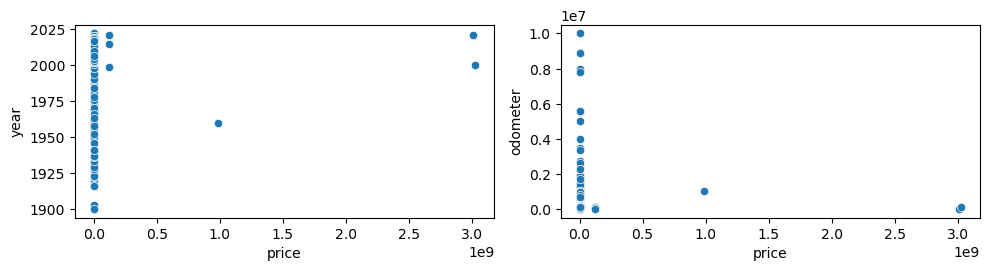

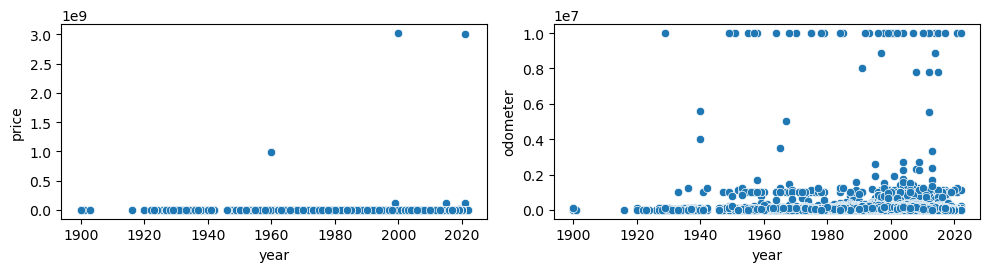

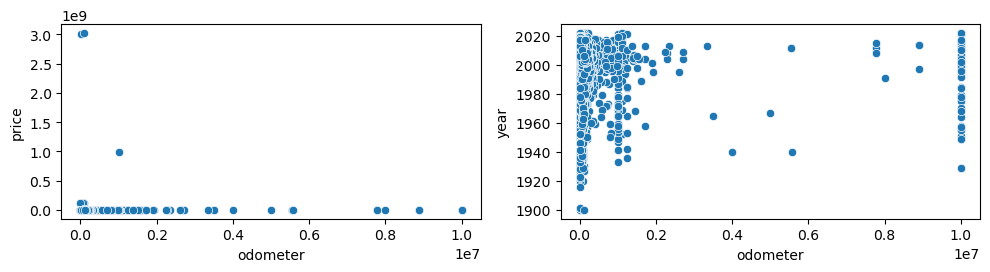

In [83]:
t = 1 

for num in numerical_cols:
    plt.figure(figsize=(10,25))
    for temp_num in numerical_cols:
        if num != temp_num:
            plt.subplot(10,2,t)
            sns.scatterplot(data= data, x = num, y = temp_num)
            plt.xlabel(num)
            plt.ylabel(temp_num)
            t += 1
            plt.tight_layout()
    plt.show()
            
        

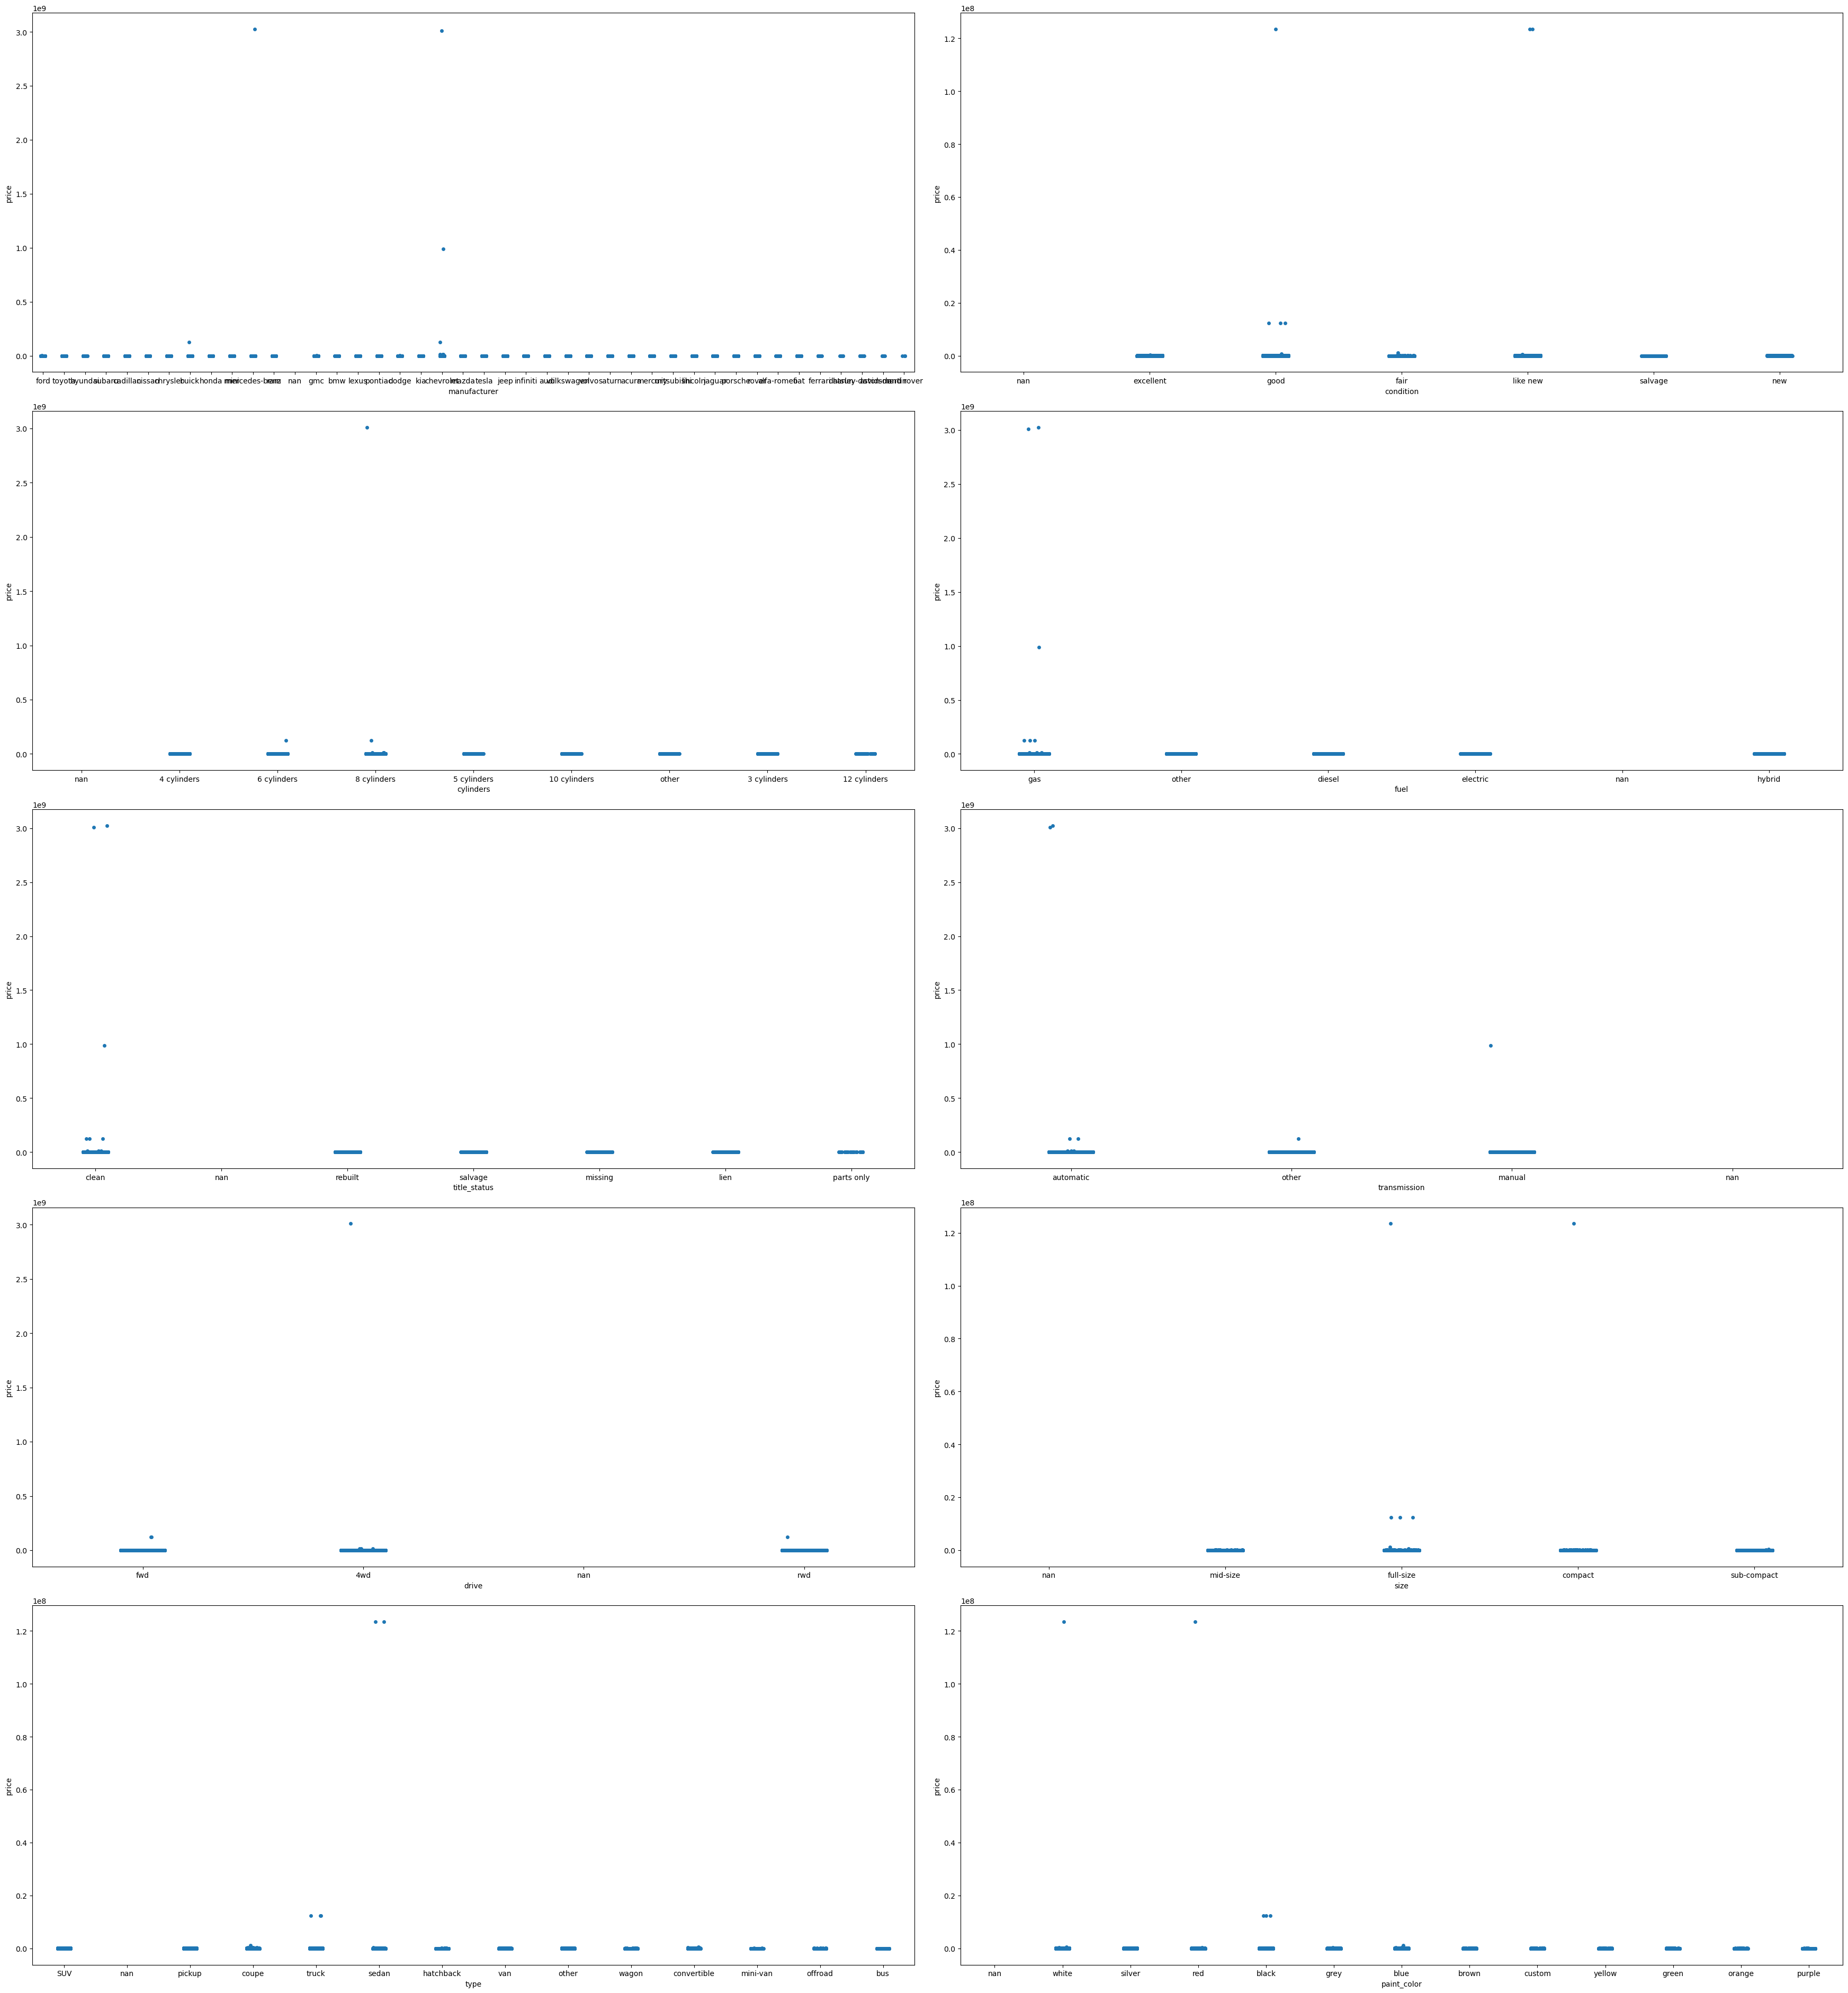

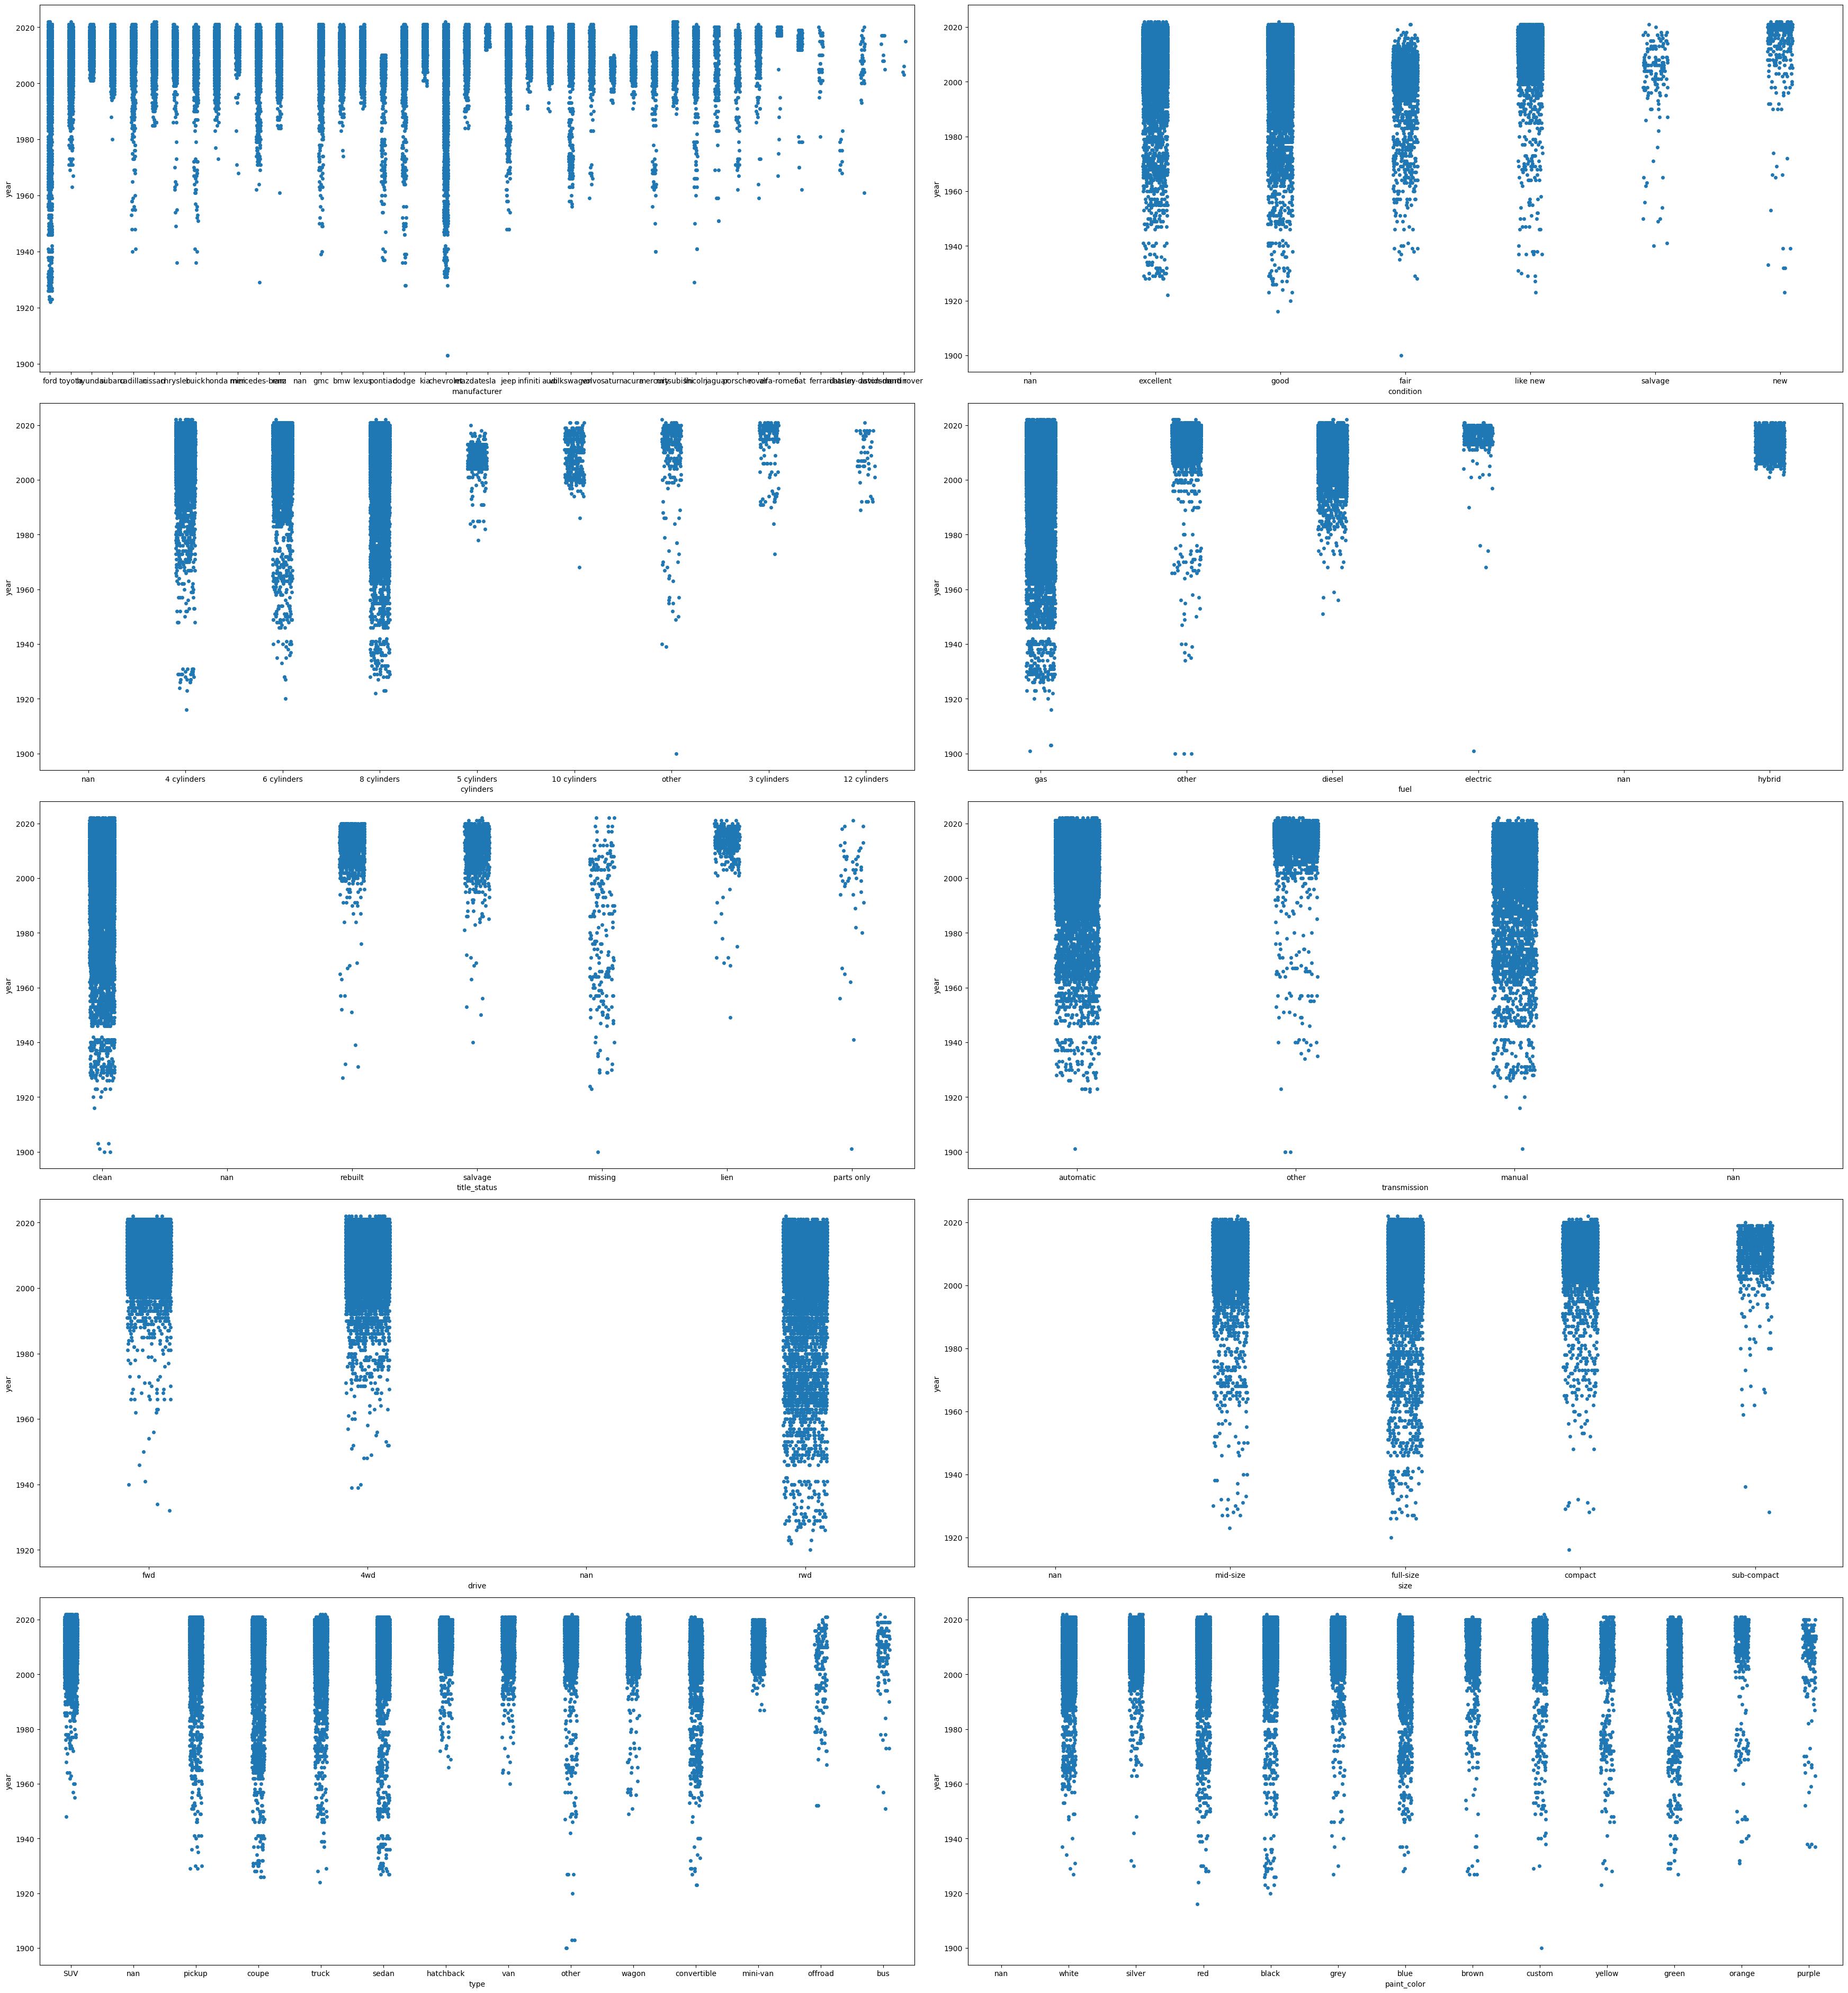

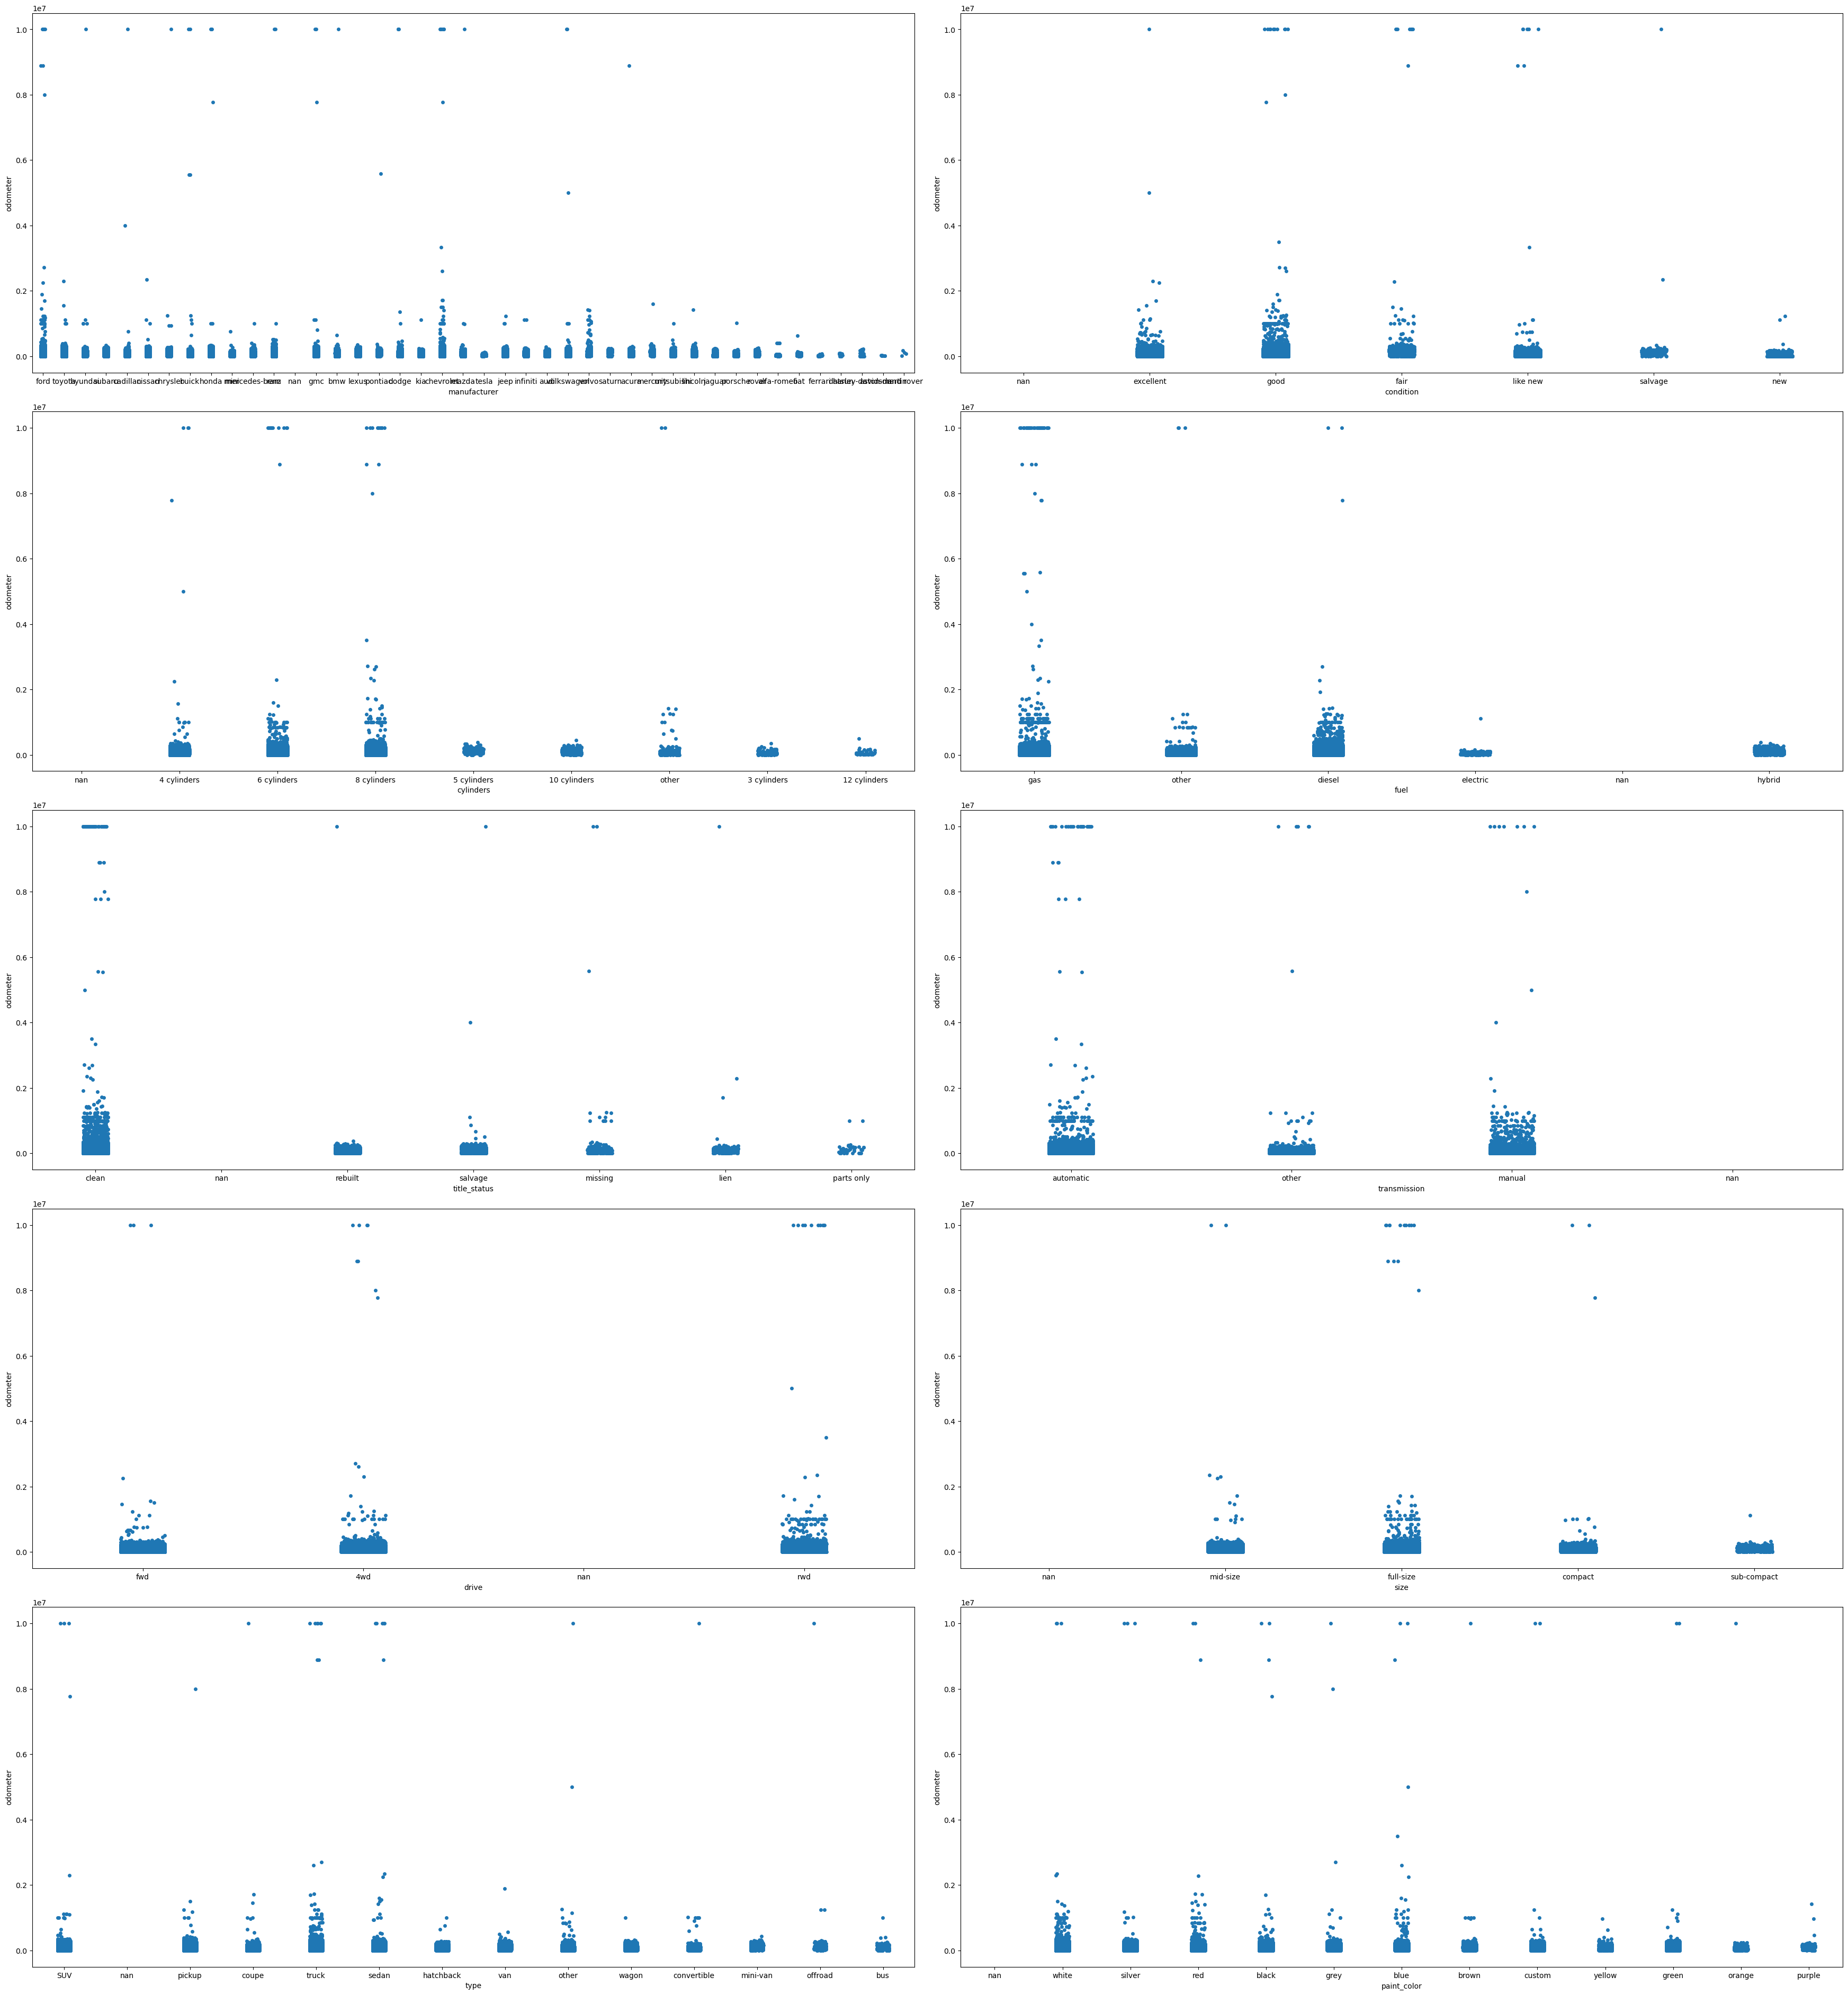

In [84]:
# Cat vs Num

t = 1 
for num in numerical_cols:
    plt.figure(figsize=(35,120))
    for cat in categorical_cols:
        plt.subplot((len(numerical_cols.columns) * len(categorical_cols.columns) )//2 + 1, 2, t)
        sns.stripplot(data=data, x = cat, y = num)
        t += 1
    plt.tight_layout()
    plt.show()

In [85]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

# Handling Outliers and Missing Values 

In [86]:
def get_bounedValue(dataset, column_name):
    q1 = dataset[column_name].quantile(0.25)
    q3 = dataset[column_name].quantile(0.75)
    
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    return lower_bound, upper_bound

In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         100000 non-null  int64  
 1   year          99733 non-null   float64
 2   manufacturer  95932 non-null   object 
 3   condition     59149 non-null   object 
 4   cylinders     58385 non-null   object 
 5   fuel          99294 non-null   object 
 6   odometer      98991 non-null   float64
 7   title_status  98112 non-null   object 
 8   transmission  99428 non-null   object 
 9   drive         69451 non-null   object 
 10  size          28152 non-null   object 
 11  type          78281 non-null   object 
 12  paint_color   69459 non-null   object 
dtypes: float64(2), int64(1), object(10)
memory usage: 9.9+ MB


In [88]:
#there are some values that are misclassified.

In [89]:
data.drop(data[(data['price'] >= 0 ) & (data['price'] <= 200)].index, inplace=True)

In [90]:
median_year = data['year'].median()

data['year'].fillna(median_year, inplace=True)
data['year'].isna().sum()

0

In [91]:
data['year'] = data['year'].astype('int64')

In [92]:
data['odometer'] = data['odometer'].fillna(data['odometer'].median())

In [93]:
## Removing the outliers 

In [94]:
for num_name in numerical_cols:
    lower_bound, upper_bound = get_bounedValue(data, num_name)
    #     print(lower_bound, upper_bound)
    data = data[(data[num_name] > lower_bound) & (data[num_name] < upper_bound)]



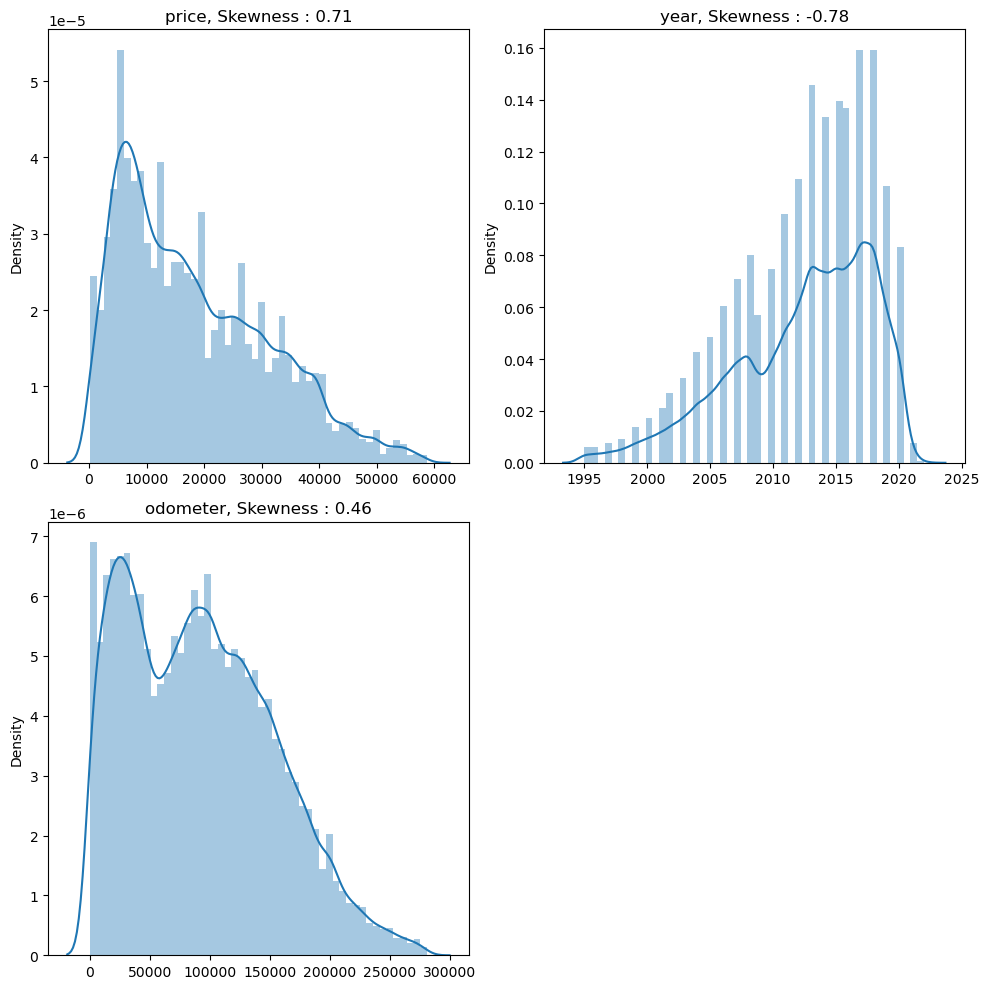

In [95]:
# Displot 
t = 1
plt.figure(figsize=(10,10))

for i in numerical_cols:
    plt.subplot(2,2,t)
    sns.distplot(x = data[i])
    plt.title(f'{i}, Skewness : {round(data[i].skew(),2)}')
    t += 1
plt.tight_layout()
plt.show()

In [96]:
data[categorical_cols.columns].isna().sum()/len(data) * 100

manufacturer    3.22804
condition      38.27650
cylinders      40.92605
fuel            0.70874
title_status    1.96311
transmission    0.44707
drive          30.32550
size           72.57164
type           20.64021
paint_color    29.10751
dtype: float64

In [97]:
for cat in categorical_cols:
    data[cat]= data[cat].fillna(data[cat].mode()[0])

## Split the Data

In [98]:
y = data['price']
X = data.drop(columns="price")

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state = 42)

In [100]:
X_train.shape, X_test.shape

((63916, 12), (21306, 12))

In [101]:
y_train.shape, y_test.shape

((63916,), (21306,))

## Encoding 

In [102]:
data[categorical_cols.columns].info()

<class 'pandas.core.frame.DataFrame'>
Index: 85222 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   manufacturer  85222 non-null  object
 1   condition     85222 non-null  object
 2   cylinders     85222 non-null  object
 3   fuel          85222 non-null  object
 4   title_status  85222 non-null  object
 5   transmission  85222 non-null  object
 6   drive         85222 non-null  object
 7   size          85222 non-null  object
 8   type          85222 non-null  object
 9   paint_color   85222 non-null  object
dtypes: object(10)
memory usage: 7.2+ MB


In [103]:
categorical_cols.columns

Index(['manufacturer', 'condition', 'cylinders', 'fuel', 'title_status',
       'transmission', 'drive', 'size', 'type', 'paint_color'],
      dtype='object')

In [104]:
label_encoders = {}

In [105]:
for col in categorical_cols:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])
    label_encoders[col] = le

In [106]:
X_train

,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color
8572,2014,29,2,5,2,117110.00000,0,2,0,1,12,9
68402,2015,12,0,5,2,146162.00000,0,0,2,1,11,10
58873,2015,38,2,5,2,39649.00000,0,2,1,1,4,0
61202,2007,12,0,6,2,167198.00000,0,0,0,1,0,10
7425,2010,13,2,5,0,160825.00000,0,0,0,1,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7372,1996,7,0,6,2,175000.00000,0,0,0,1,0,10
64448,2016,13,2,5,2,53000.00000,0,0,0,1,0,5
90159,2020,6,2,5,0,4174.00000,0,2,0,1,4,10
998,2020,33,2,5,2,7835.00000,0,2,0,1,7,8


In [107]:
X_test

,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color
49000,2014,37,2,5,2,79069.00000,0,0,0,1,12,10
96162,2013,19,2,5,2,130050.00000,0,0,0,1,9,10
44000,2004,38,0,3,2,104717.00000,0,0,1,3,9,9
95122,2017,7,2,5,2,102.00000,0,2,0,1,8,8
18119,2009,16,2,3,2,111387.00000,4,0,1,1,9,10
...,...,...,...,...,...,...,...,...,...,...,...,...
75449,2011,29,0,3,2,116000.00000,0,0,1,2,9,0
4162,2004,12,2,5,0,214000.00000,0,0,0,1,9,10
93717,2007,22,0,5,2,94000.00000,0,0,2,1,9,5
50576,2007,16,1,5,2,111373.00000,0,0,0,1,0,10


In [108]:
import sklearn
sklearn.__version__

'1.5.1'

## Transformation 

## Scaling ~ Standardization

In [53]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [54]:
X_train.shape

(63916, 12)

## Model Creation

In [55]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

def evaluate_regressors(X_train, X_test, y_train, y_test):
    models = {
        'LinearRegression': LinearRegression(),
        'Ridge': Ridge(),
        'Lasso': Lasso(),
        'ElasticNet': ElasticNet(),
        'DecisionTreeRegressor': DecisionTreeRegressor(),
        'RandomForestRegressor': RandomForestRegressor(),
        'ExtraTreesRegressor': ExtraTreesRegressor(),
        'GradientBoostingRegressor': GradientBoostingRegressor(),
        'KNeighborsRegressor': KNeighborsRegressor(),
    }

    results = []
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        results.append({"name": name, "Model": model, "r2": r2})

    df_results = pd.DataFrame(results).sort_values(by=['r2'], ascending=False, ignore_index=True)
    return df_results

df_scores = evaluate_regressors(X_train, X_test, y_train, y_test)
print(df_scores)


                        name  \
0      RandomForestRegressor   
1        ExtraTreesRegressor   
2        KNeighborsRegressor   
3  GradientBoostingRegressor   
4      DecisionTreeRegressor   
5           LinearRegression   
6                      Ridge   
7                      Lasso   
8                 ElasticNet   

                                               Model      r2  
0  (DecisionTreeRegressor(max_features=1.0, rando... 0.81256  
1  (ExtraTreeRegressor(random_state=2117908182), ... 0.80605  
2                              KNeighborsRegressor() 0.72674  
3  ([DecisionTreeRegressor(criterion='friedman_ms... 0.69933  
4                            DecisionTreeRegressor() 0.66363  
5                                 LinearRegression() 0.52040  
6                                            Ridge() 0.52040  
7                                            Lasso() 0.52039  
8                                       ElasticNet() 0.48246  


In [226]:
from sklearn.model_selection import GridSearchCV

def evaluate_regressors(X_train, X_test, y_train, y_test):
    models = {
        'LinearRegression': LinearRegression(),
        'Ridge': Ridge(),
        'Lasso': Lasso(),
        'ElasticNet': ElasticNet(),
        'DecisionTreeRegressor': DecisionTreeRegressor(),
        'RandomForestRegressor': RandomForestRegressor(),
        'ExtraTreesRegressor': ExtraTreesRegressor(),
        'GradientBoostingRegressor': GradientBoostingRegressor(),
        'KNeighborsRegressor': KNeighborsRegressor(),
    }
    
    param_grid = {
        'Ridge': {'alpha': [0.01, 0.1, 1, 10, 100]},
        'Lasso': {'alpha': [0.01, 0.1, 1, 10, 100]},
        'ElasticNet': {'alpha': [0.01, 0.1, 1, 10, 100], 'l1_ratio': [0.1, 0.5, 0.9]},
        'DecisionTreeRegressor': {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]},
        'RandomForestRegressor': {'n_estimators': [100, 200], 'max_depth': [None, 10, 20]},
        'ExtraTreesRegressor': {'n_estimators': [100, 200], 'max_depth': [None, 10, 20]},
        'GradientBoostingRegressor': {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1, 0.2]},
        'KNeighborsRegressor': {'n_neighbors': [3, 5, 7, 9]},
    }
    
    results = []
    for name, model in models.items():
        if name in param_grid:
            grid_search = GridSearchCV(model, param_grid[name], cv=5, scoring='r2', n_jobs=-1)
            grid_search.fit(X_train, y_train)
            best_model = grid_search.best_estimator_
        else:
            best_model = model
            best_model.fit(X_train, y_train)
        
        y_pred = best_model.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        results.append({"name": name, "Model": best_model, "r2": r2, "Best Params": grid_search.best_params_ if name in param_grid else None})
    
    df_results = pd.DataFrame(results).sort_values(by=['r2'], ascending=False, ignore_index=True)
    return df_results


In [227]:
df_scores = evaluate_regressors(X_train, X_test, y_train, y_test)
print(df_scores)

                        name  \
0      RandomForestRegressor   
1        ExtraTreesRegressor   
2  GradientBoostingRegressor   
3        KNeighborsRegressor   
4      DecisionTreeRegressor   
5           LinearRegression   
6                      Ridge   
7                      Lasso   
8                 ElasticNet   

                                               Model      r2  \
0  (DecisionTreeRegressor(max_features=1.0, rando... 0.81466   
1  (ExtraTreeRegressor(random_state=2001078256), ... 0.80698   
2  ([DecisionTreeRegressor(criterion='friedman_ms... 0.73926   
3                              KNeighborsRegressor() 0.72674   
4  DecisionTreeRegressor(max_depth=20, min_sample... 0.70935   
5                                 LinearRegression() 0.52040   
6                                    Ridge(alpha=10) 0.52040   
7                                     Lasso(alpha=1) 0.52039   
8               ElasticNet(alpha=0.01, l1_ratio=0.9) 0.52039   

                                   Bes

## Final Model

In [56]:
final_model = RandomForestRegressor()
final_model.fit(X_train, y_train)

RandomForestRegressor()

In [57]:
y_pred = final_model.predict(X_test)

In [58]:
y_pred

array([16372.85      , 17146.6425    ,  3639.11190476, ...,
        9146.82      ,  6685.91      ,  5741.06      ])

In [59]:
r2_score(y_test, y_pred)

0.8143839639159132

In [60]:
data.to_excel('Html_template.xlsx')

Make pickle file of these 
1. Label Encoder : label_encoder
2. Standard Scaler : sc
3. RandomForestRegressor : model


In [61]:
import pickle

In [62]:
for key, val in label_encoders.items():
    path = key+'.pkl'
    with open(path, 'wb') as f:
        pickle.dump(val, f)

In [64]:
# pickle.dump(label_encoder, open('label_encoder.pkl','wb'))
pickle.dump(sc, open('standard_scaler.pkl','wb'))
pickle.dump(final_model, open('final_model.pkl','wb'))

In [ ]:
data['paint_color'].value_counts().index

In [124]:
data.columns

Index(['price', 'year', 'manufacturer', 'condition', 'cylinders', 'fuel',
       'odometer', 'title_status', 'transmission', 'drive', 'size', 'type',
       'paint_color'],
      dtype='object')

In [53]:
data.drop('price',axis = 1)

,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color
0,2009,ford,good,6 cylinders,gas,1.00000,clean,automatic,fwd,full-size,SUV,white
1,2020,ford,good,6 cylinders,gas,27130.00000,clean,automatic,4wd,full-size,sedan,white
2,2019,ford,excellent,6 cylinders,gas,15000.00000,clean,automatic,4wd,full-size,sedan,white
3,2014,toyota,good,6 cylinders,other,15242.00000,clean,other,4wd,full-size,pickup,silver
4,2012,hyundai,good,4 cylinders,gas,116658.00000,clean,automatic,fwd,mid-size,coupe,white
...,...,...,...,...,...,...,...,...,...,...,...,...
99993,2004,chevrolet,good,8 cylinders,gas,147824.00000,clean,automatic,4wd,full-size,pickup,grey
99995,2013,chevrolet,good,6 cylinders,gas,1.00000,clean,automatic,4wd,full-size,sedan,white
99996,2017,toyota,excellent,4 cylinders,hybrid,15400.00000,clean,automatic,fwd,compact,hatchback,blue
99998,2010,chevrolet,good,6 cylinders,gas,72032.00000,clean,automatic,4wd,full-size,truck,grey


In [109]:
import sklearn

In [110]:
sklearn.__version__


'1.5.1'

In [111]:
import sklearn
print(sklearn.__version__)


1.5.1
